## AutoEncoder Method 1

### Data Loading and hyperparameter tuning

x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)
x_test  shape: (10000, 28, 28, 1) y_test shape: (10000,)


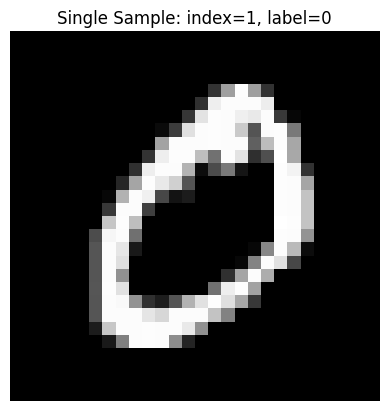

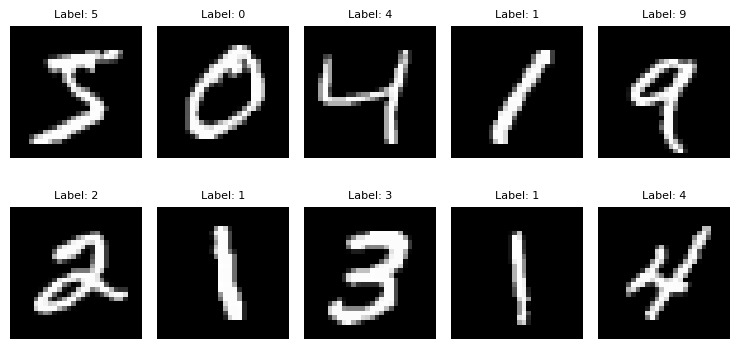

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# If you're using a Jupyter Notebook, uncomment the next line:
# %matplotlib inline

# Load MNIST data along with labels
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Expand dimensions to add the channel (for convolutional layers)
x_train = np.expand_dims(x_train, axis=-1)  # (N, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)   # (N, 28, 28, 1)

# Print shapes to confirm
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test  shape:", x_test.shape,  "y_test shape:", y_test.shape)

# Visualize a single sample
sample_index = 1  # choose any index you like
image = x_train[sample_index]
plt.figure()
plt.imshow(image.reshape(28,28), cmap='gray')
plt.title(f"Single Sample: index={sample_index}, label={y_train[sample_index]}")
plt.axis("off")
plt.show()

# Define a helper function to plot multiple images with labels
def plot_digits(images, labels, num_row, num_col):
    """
    Plots a grid of images with their corresponding labels.
    images: array of shape (N, 28, 28, 1)
    labels: array of shape (N,)
    """
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))
    num = num_row * num_col
    for i in range(num):
        ax = axes[i // num_col, i % num_col]
        ax.imshow(images[i].reshape(28,28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}", fontsize=8)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Plot first 10 images (2 rows x 5 columns)
num_row = 2
num_col = 5
images_to_plot = x_train[:num_row * num_col]
labels_to_plot = y_train[:num_row * num_col]
plot_digits(images_to_plot, labels_to_plot, num_row, num_col)


### Vanilla Autoencoder (AE)

In [16]:
# Define the latent dimension for the latent space
latent_dim = 10

# ------------------------
# Vanilla Autoencoder (AE)
# ------------------------
# Define the encoder for the AE
encoder_input = keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_input)
x = layers.Dense(128, activation="relu")(x)
encoder_output = layers.Dense(latent_dim)(x)
encoder_ae = keras.Model(encoder_input, encoder_output, name="encoder_ae")

# Define the decoder (we will also use it for the VAE later)
decoder_input = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation="relu")(decoder_input)
x = layers.Dense(28 * 28, activation="sigmoid")(x)
decoder_output = layers.Reshape((28, 28, 1))(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

# Combine encoder and decoder to form the autoencoder
autoencoder_input = keras.Input(shape=(28, 28, 1))
encoded = encoder_ae(autoencoder_input)
decoded = decoder(encoded)
autoencoder = keras.Model(autoencoder_input, decoded, name="autoencoder")

# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="mse")


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0741 - val_loss: 0.0284
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0275 - val_loss: 0.0240
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0241 - val_loss: 0.0221
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0222 - val_loss: 0.0210
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0212 - val_loss: 0.0203
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0203 - val_loss: 0.0196
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0198 - val_loss: 0.0191
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0193 - val_loss: 0.0187
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0188 - val_loss: 0.0184
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0185 - val_loss: 0.0181
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0182 - val_loss: 0.0178
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


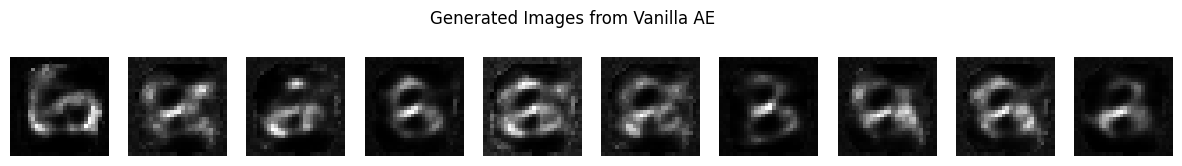

In [17]:
# Train the Vanilla Autoencoder (AE)
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128,
                validation_data=(x_test, x_test))

# Generate images using the AE decoder with random latent vectors:
random_latent_vectors_ae = np.random.normal(size=(10, latent_dim))
generated_images_ae = decoder.predict(random_latent_vectors_ae)

# Optionally, visualize the generated images from the AE decoder
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(generated_images_ae[i].squeeze(), cmap="gray")
    axes[i].axis("off")
plt.suptitle("Generated Images from Vanilla AE")
plt.show()


### Variational Autoencoder (VAE)

In [18]:
# ------------------------
# Variational Autoencoder (VAE)
# ------------------------
# Define a Sampling layer to implement the reparameterization trick
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Define the encoder for the VAE
vae_encoder_input = keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(vae_encoder_input)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
vae_encoder = keras.Model(vae_encoder_input, [z_mean, z_log_var, z], name="vae_encoder")

# Create a custom VAE model by subclassing keras.Model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        # Inference: encode and decode input
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        # data is received as (x, dummy_y); we only use x
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstructed = self.decoder(z, training=True)
            # Reconstruction loss: mean squared error scaled by image size
            reconstruction_loss = tf.reduce_mean(
                keras.losses.mse(tf.reshape(data, [-1]), tf.reshape(reconstructed, [-1]))
            ) * (28 * 28)
            # KL divergence loss: encourages latent space to follow a unit Gaussian
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}

    def test_step(self, data):
        # For validation: similar to train_step but without gradient update
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstructed = self.decoder(z, training=False)
        reconstruction_loss = tf.reduce_mean(
            keras.losses.mse(tf.reshape(data, [-1]), tf.reshape(reconstructed, [-1]))
        ) * (28 * 28)
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        total_loss = reconstruction_loss + kl_loss
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}

# Instantiate and compile the VAE
vae = VAE(vae_encoder, decoder)
# Use a dummy loss function since the loss is computed in train_step
vae.compile(optimizer=keras.optimizers.Adam(), loss=lambda y_true, y_pred: 0)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - kl_loss: 3.5127 - loss: 24.1092 - reconstruction_loss: 20.5965 - val_kl_loss: 4.4311 - val_loss: 16.9809 - val_reconstruction_loss: 12.5498
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.2306 - loss: 19.1065 - reconstruction_loss: 15.8759 - val_kl_loss: 3.8838 - val_loss: 15.5838 - val_reconstruction_loss: 11.6999
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 3.0306 - loss: 18.1185 - reconstruction_loss: 15.0879 - val_kl_loss: 3.5917 - val_loss: 15.0131 - val_reconstruction_loss: 11.4214
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 2.9207 - loss: 17.5560 - reconstruction_loss: 14.6354 - val_kl_loss: 3.3888 - val_loss: 14.1439 - val_reconstruction_loss: 10.7551
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 2.8467 - loss: 17.1615 - reconstruction_loss: 14.3148 - val_kl_loss: 3.2693 - val_loss: 14.1410 - val_reconstruction_loss: 10.8717
Epoch 6/20
469/469 ━━━━━━━━━━

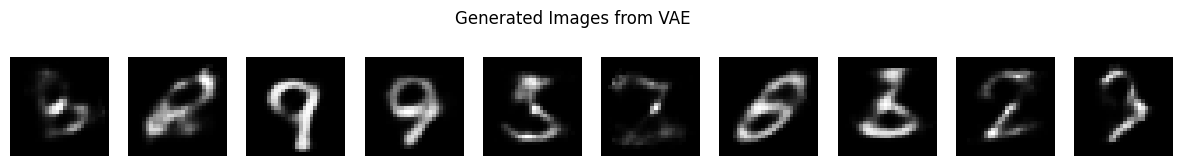

In [19]:
# Train the VAE using (x, x) as training and validation data
vae.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

# Generate images using the VAE decoder (which is the same as the shared decoder)
random_latent_vectors_vae = np.random.normal(size=(10, latent_dim))
generated_images_vae = decoder.predict(random_latent_vectors_vae)

# Optionally, visualize the generated images from the VAE decoder
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i in range(10):
    axes[i].imshow(generated_images_vae[i].squeeze(), cmap="gray")
    axes[i].axis("off")
plt.suptitle("Generated Images from VAE")
plt.show()


### compare AE vs VAE

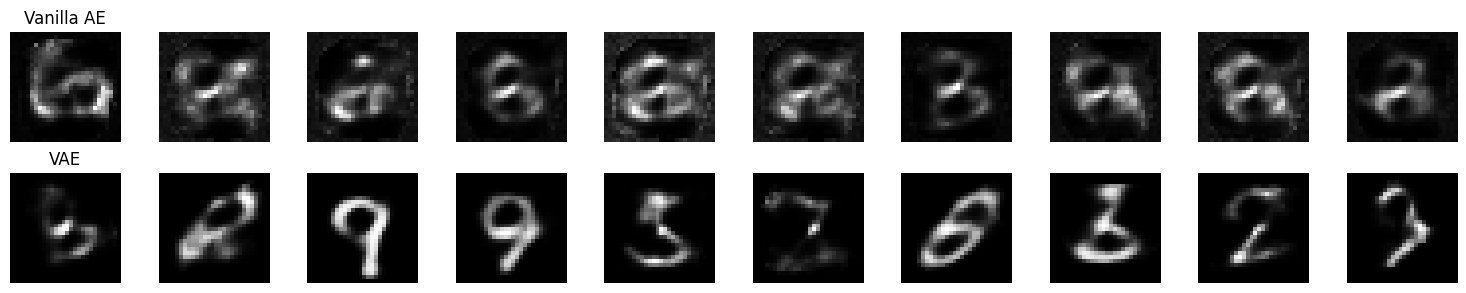

In [20]:
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(generated_images_ae[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(generated_images_vae[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")
axes[0, 0].set_title("Vanilla AE")
axes[1, 0].set_title("VAE")
plt.tight_layout()
plt.show()


## AutoEncoder Method 2 (Dense layer, Batch Normalisation, Dropout, KL)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.4937 - val_loss: 0.2291
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2054 - val_loss: 0.1660
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1674 - val_loss: 0.1459
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1524 - val_loss: 0.1351
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1429 - val_loss: 0.1271
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1366 - val_loss: 0.1213
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1318 - val_loss: 0.1170
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1282 - val_loss: 0.1138
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1254 - val_loss: 0.1110
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1230 - val_loss: 0.1090
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1215 - val_loss: 0.1073
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

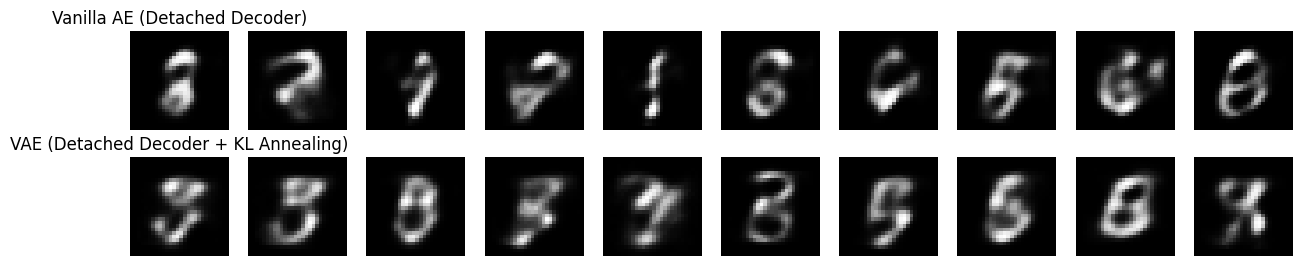

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


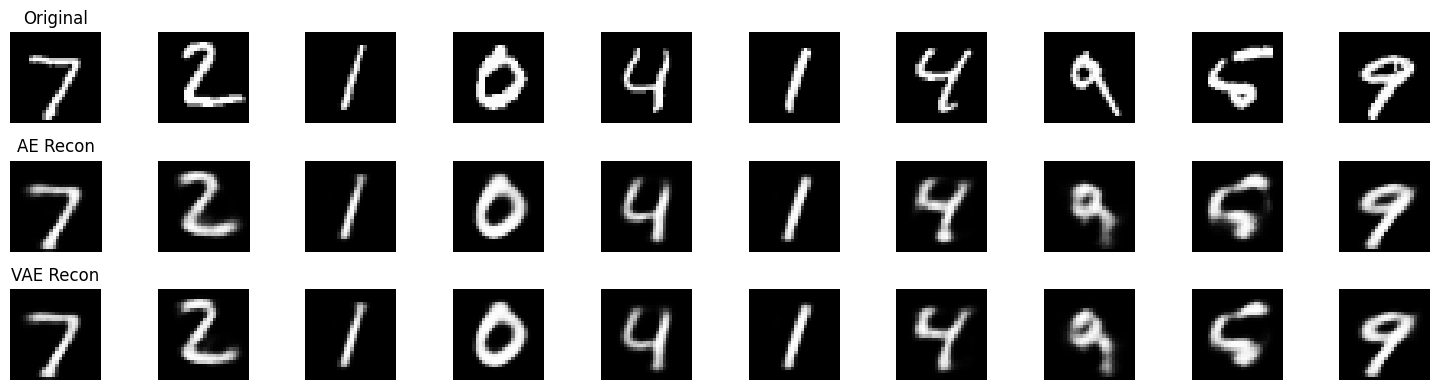

In [50]:

# Hyperparameters

latent_dim = 20
batch_size = 128
epochs = 20
learning_rate = 1e-4


# Deeper Autoencoder (AE)

ae_encoder_input = keras.Input(shape=(28, 28, 1), name="ae_encoder_input")
x = layers.Flatten(name="flatten")(ae_encoder_input)
x = layers.Dense(256, name="dense_256")(x)
x = layers.BatchNormalization(name="bn_256")(x)
x = layers.LeakyReLU(alpha=0.2, name="leakyrelu_256")(x)
x = layers.Dropout(0.2, name="dropout_0.2")(x)
x = layers.Dense(128, name="dense_128")(x)
x = layers.BatchNormalization(name="bn_128")(x)
x = layers.LeakyReLU(alpha=0.2, name="leakyrelu_128")(x)
ae_latent = layers.Dense(latent_dim, name="ae_latent")(x)
encoder_ae = keras.Model(ae_encoder_input, ae_latent, name="encoder_ae")

# AE Decoder
ae_decoder_input = keras.Input(shape=(latent_dim,), name="ae_decoder_input")
x = layers.Dense(128, name="dense_128_dec")(ae_decoder_input)
x = layers.BatchNormalization(name="bn_128_dec")(x)
x = layers.LeakyReLU(alpha=0.2, name="leakyrelu_128_dec")(x)
x = layers.Dropout(0.2, name="dropout_0.2_dec")(x)
x = layers.Dense(256, name="dense_256_dec")(x)
x = layers.BatchNormalization(name="bn_256_dec")(x)
x = layers.LeakyReLU(alpha=0.2, name="leakyrelu_256_dec")(x)
x = layers.Dense(28 * 28, activation="sigmoid", name="dense_output")(x)
ae_decoder_output = layers.Reshape((28, 28, 1), name="decoder_output")(x)
decoder_ae = keras.Model(ae_decoder_input, ae_decoder_output, name="decoder_ae")

# Full AE Model
ae_input = keras.Input(shape=(28, 28, 1), name="ae_input")
encoded_ae = encoder_ae(ae_input)
decoded_ae = decoder_ae(encoded_ae)
autoencoder = keras.Model(ae_input, decoded_ae, name="autoencoder")

autoencoder.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss="binary_crossentropy"
)
autoencoder.fit(
    x_train, x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test)
)


# Detach the AE decoder and generate images using latent vectors

num_samples = 10
random_vectors_ae = np.random.normal(size=(num_samples, latent_dim))
generated_images_ae = decoder_ae.predict(random_vectors_ae)

# Deeper Variational Autoencoder (VAE)

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# VAE Encoder
vae_encoder_input = keras.Input(shape=(28, 28, 1), name="vae_encoder_input")
x = layers.Flatten(name="vae_flatten")(vae_encoder_input)
x = layers.Dense(256, name="vae_dense_256")(x)
x = layers.BatchNormalization(name="vae_bn_256")(x)
x = layers.LeakyReLU(alpha=0.2, name="vae_leakyrelu_256")(x)
x = layers.Dropout(0.2, name="vae_dropout")(x)
x = layers.Dense(128, name="vae_dense_128")(x)
x = layers.BatchNormalization(name="vae_bn_128")(x)
x = layers.LeakyReLU(alpha=0.2, name="vae_leakyrelu_128")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling(name="sampling")([z_mean, z_log_var])
vae_encoder = keras.Model(vae_encoder_input, [z_mean, z_log_var, z], name="vae_encoder")


# Separate VAE Decoder

vae_decoder_input = keras.Input(shape=(latent_dim,), name="vae_decoder_input")
x = layers.Dense(128, name="vae_dense_128_dec")(vae_decoder_input)
x = layers.BatchNormalization(name="vae_bn_128_dec")(x)
x = layers.LeakyReLU(alpha=0.2, name="vae_leakyrelu_128_dec")(x)
x = layers.Dropout(0.2, name="vae_dropout_0.2_dec")(x)
x = layers.Dense(256, name="vae_dense_256_dec")(x)
x = layers.BatchNormalization(name="vae_bn_256_dec")(x)
x = layers.LeakyReLU(alpha=0.2, name="vae_leakyrelu_256_dec")(x)
x = layers.Dense(28 * 28, activation="sigmoid", name="vae_dense_output")(x)
vae_decoder_output = layers.Reshape((28, 28, 1), name="vae_decoder_output")(x)
decoder_vae = keras.Model(vae_decoder_input, vae_decoder_output, name="decoder_vae")

# VAE model class with KL annealing
class VAE(keras.Model):
    def __init__(self, encoder, decoder, total_epochs=epochs, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_epochs = total_epochs
        self.current_epoch = 0

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        kl_factor = tf.cast(self.current_epoch, tf.float32) / tf.cast(self.total_epochs, tf.float32)
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            reconstructed = self.decoder(z, training=True)
            recon_loss = keras.losses.binary_crossentropy(
                tf.reshape(data, [-1, 28 * 28]),
                tf.reshape(reconstructed, [-1, 28 * 28])
            )
            recon_loss = tf.reduce_mean(recon_loss) * 28 * 28
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = recon_loss + kl_factor * kl_loss
        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {
            "loss": total_loss,
            "reconstruction_loss": recon_loss,
            "kl_loss": kl_loss,
            "kl_factor": kl_factor
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        z_mean, z_log_var, z = self.encoder(data, training=False)
        reconstructed = self.decoder(z, training=False)
        recon_loss = keras.losses.binary_crossentropy(
            tf.reshape(data, [-1, 28 * 28]),
            tf.reshape(reconstructed, [-1, 28 * 28])
        )
        recon_loss = tf.reduce_mean(recon_loss) * 28 * 28
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        total_loss = recon_loss + kl_loss
        return {
            "loss": total_loss,
            "reconstruction_loss": recon_loss,
            "kl_loss": kl_loss
        }

    def on_epoch_end(self, epoch, logs=None):
        self.current_epoch = epoch + 1
        super().on_epoch_end(epoch, logs)

# Instantiate and compile the VAE with its separate decoder
vae = VAE(vae_encoder, decoder_vae, total_epochs=epochs)
vae.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=lambda y_true, y_pred: 0
)
vae.fit(
    x_train, x_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, x_test)
)


# Detach the VAE decoder and generate images using latent vectors

random_vectors_vae = np.random.normal(size=(num_samples, latent_dim))
generated_images_vae = decoder_vae.predict(random_vectors_vae)


# Visualization: Compare AE vs. VAE Generated Images

fig, axes = plt.subplots(2, num_samples, figsize=(15, 3))
for i in range(num_samples):
    axes[0, i].imshow(generated_images_ae[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")
    axes[1, i].imshow(generated_images_vae[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")

axes[0, 0].set_title("Vanilla AE (Detached Decoder)")
axes[1, 0].set_title("VAE (Detached Decoder + KL Annealing)")
plt.show()

# Visualization: Compare Reconstructions

num_recon = 10
test_batch = x_test[:num_recon]

recon_ae = autoencoder.predict(test_batch)
recon_vae = vae.predict(test_batch)

fig, axes = plt.subplots(3, num_recon, figsize=(15, 4))
for i in range(num_recon):
    # Original image
    axes[0, i].imshow(test_batch[i].squeeze(), cmap="gray")
    axes[0, i].axis("off")
    if i == 0:
        axes[0, i].set_title("Original")
    # AE Reconstruction
    axes[1, i].imshow(recon_ae[i].squeeze(), cmap="gray")
    axes[1, i].axis("off")
    if i == 0:
        axes[1, i].set_title("AE Recon")
    # VAE Reconstruction
    axes[2, i].imshow(recon_vae[i].squeeze(), cmap="gray")
    axes[2, i].axis("off")
    if i == 0:
        axes[2, i].set_title("VAE Recon")

plt.tight_layout()
plt.show()
